In [6]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Read yearly deaths dataset
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [8]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']

# Extract Clinic 1 data and Clinic 2 data 
clinic_1 = yearly[yearly['clinic'] == 'clinic 1']
clinic_2 = yearly[yearly['clinic'] == 'clinic 2']

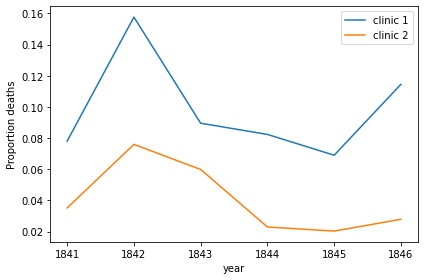

In [9]:
# Plot yearly proportion of deaths at the two clinics
fig, ax = plt.subplots()
clinic_1.plot(ax=ax, x='year', y='proportion_deaths', label='clinic 1')
clinic_2.plot(ax=ax, x='year', y='proportion_deaths', label='clinic 2')
ax.set_ylabel('Proportion deaths')
plt.show()

In [110]:
# Read monthly deaths dataset
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly['deaths'] / monthly['births']

monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


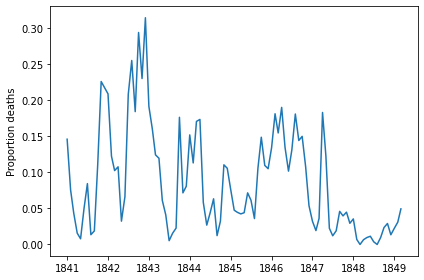

In [112]:
# Plot monthly proportion of deaths
fig, ax = plt.subplots()
ax.plot(monthly['date'], monthly["proportion_deaths"])
ax.set_ylabel('Proportion deaths')
plt.show()

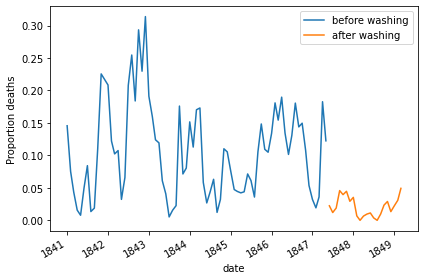

In [114]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
fig, ax = plt.subplots()
before_washing.plot(ax=ax, x='date', y="proportion_deaths", label='before washing')
after_washing.plot(ax=ax, x='date', y="proportion_deaths", label='after washing')
ax.set_ylabel('Proportion deaths')
plt.show()

In [116]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

In [118]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101188
0.975   -0.067367
dtype: float64